Start with our usual setup, including the utility methods from last time.

In [3]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

First, we're going to explore the Gaussian kernel. You may need to run `pip3 install opencv-python` and restart Jupyter notebook.

In [4]:
import cv2
filter = cv2.getGaussianKernel(5, 1)
filter

array([[0.05448868],
       [0.24420134],
       [0.40261995],
       [0.24420134],
       [0.05448868]])

As we might expect, this returns a 1x5 Gaussian kernel, where the standard deviation is 1. We can use two of these kernels to create a 2d filter, or we can use the higher level function GaussianBlur. Let's try that next. We'll compare the output of the Gaussian blur filter to the simple moving average blur filter we learned about earlier.

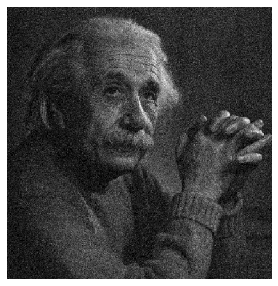

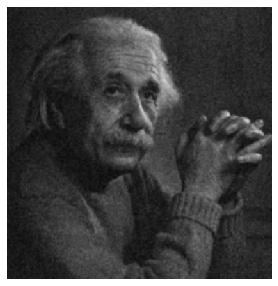

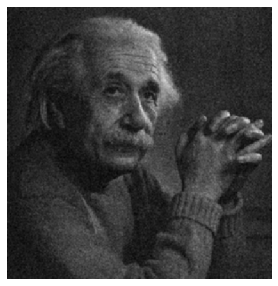

In [5]:
image = cv2.imread('./noisy_einstein.png')
display(image)

blur_image = cv2.GaussianBlur(image, (5,5), 0)
display(blur_image)

simple_blur_filter = np.array(
[
    [.11,.11,.11],
    [.11,.11,.11],
    [.11,.11,.11],
])
simple_blur_image = cv2.filter2D(image, -1, simple_blur_filter)
display(simple_blur_image)


# Exercise 1

Recall from lecture that the two parameters to Gaussian blur are kernel size and sigma. How do changing these parameters affect the output of the blur filter? You may want to find a different example image to illustrate your point.

Next, let's look at the thresholding parameters.

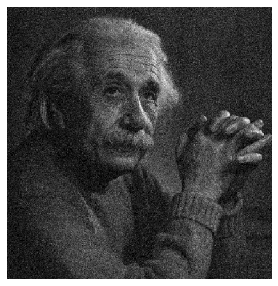

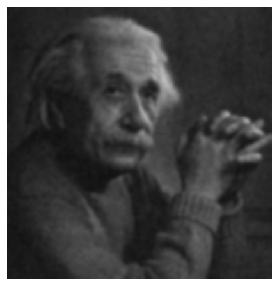

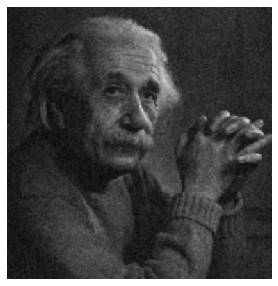

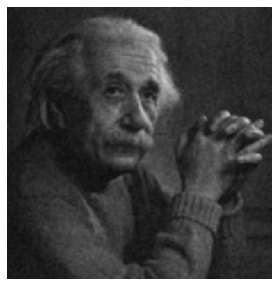

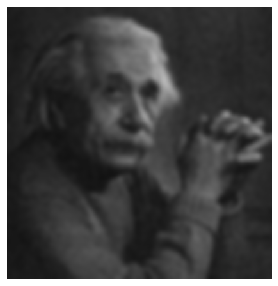

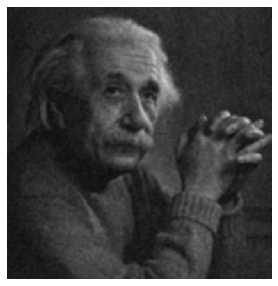

In [27]:
blur_image = cv2.GaussianBlur(image, (1,1), 0)
display(blur_image)
blur_image = cv2.GaussianBlur(image, (15,15), 0)
display(blur_image)
blur_image = cv2.GaussianBlur(image, (5,5), 1)
display(blur_image)
blur_image = cv2.GaussianBlur(image, (5,5), 4)
display(blur_image)
blur_image = cv2.GaussianBlur(image, (15,15), 4)
display(blur_image)
blur_image = cv2.GaussianBlur(image, (5,5), 100)
display(blur_image)

The kernel size determines the size of the gaussian kernel. A larger kernel will take in the pixel values of a larger array of pixels, resulting in a blurrier image. The sigma is the standard devation of the gaussian function, so a larger sigma will mean the coefficients of the pixels are more spread out and therefore the image will be slightly blurrier. However, the kernel size has a much higher impact on the blurriness.

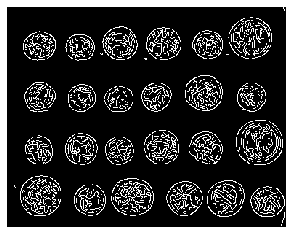

In [6]:
from skimage import feature, data

image = data.coins()
edge_image = feature.canny(image, sigma=1, low_threshold=25, high_threshold=50)
display(edge_image)

# Exercise 2

1. Play with the thresholds to get different output. How does changing each threshold affect the edges that the algorithm finds?
2. Imagine that you have an image with lots of false positives: that is, it finds lots of edges that aren't actually edges. How would you adjust thresholds to improve the result?
3. Imagine that you have an image where the edges don't connect well: that is, it finds some edges, but the edges tend to be broken lines instead of solid lines. How would you adjust thresholds to improve the result?
5. Remember from exercise 1 that the two parameters to the Gaussian blur are kernel size and sigma, and that both affect the output of the blur filter. Notice that skimage's canny implementation only takes sigma as a parameter. Without modifying the source code, how might you incorporate a different kernel size into the implementation?
4. Try to improve the edges you find by tweaking the parameters. 
5. Try running the edge detector on some different images. skimage.data has a good set to start with. You can also look at [Berkeley's collection of benchmark images](https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/segbench/). Take notes on which images Canny performs well on, and which it does not.




## #1

1. Increasing the high threshold removes large clumps of edges, while increasing the low threshold can also remove large clumps, but generally eats away small bits of the edges. This is because if a high threshold point disappears, all the low threshold areas which were connected disappear too, whereas if a low threshold point disappears, only it is gone.

2. I would first increase the high threshold to the highest it can get with all the actual edges remaining, in order to get rid of the false positives which are enabling low threshold false positives. Then I would increase the low threshold until I'm satisfied with the result.

3. Just based on the given information, I would assume that the low threshold is too high because if a given edge pixel were above the low threshold then it would have nearby pixels connect to. If the high threshold was too high, that would imply that the whole edge should disappear.

4. Run the Gaussian blur to your liking before sending it into the canny function with a sigma of 0.

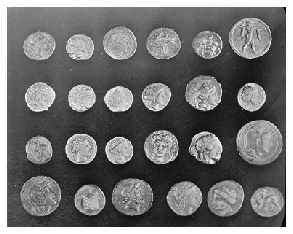

In [35]:
display(image)

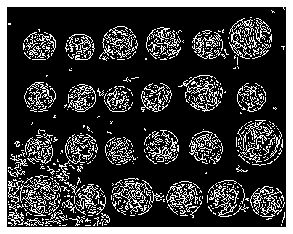

In [30]:
edge_image = feature.canny(image, sigma=0, low_threshold=25, high_threshold=70)
display(edge_image)

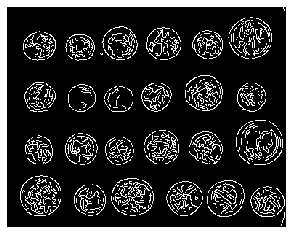

In [30]:
edge_image = feature.canny(image, sigma=1, low_threshold=25, high_threshold=70)
display(edge_image)

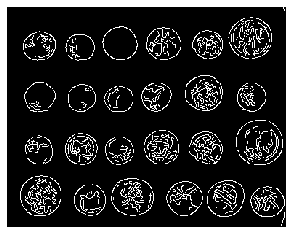

In [32]:
edge_image = feature.canny(image, sigma=1, low_threshold=25, high_threshold=110)
display(edge_image)

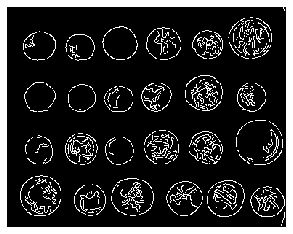

In [33]:
edge_image = feature.canny(image, sigma=1, low_threshold=25, high_threshold=130)
display(edge_image)

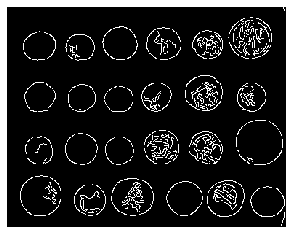

In [34]:
edge_image = feature.canny(image, sigma=1, low_threshold=25, high_threshold=160)
display(edge_image)

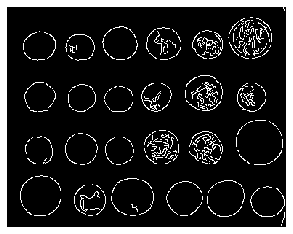

In [36]:
edge_image = feature.canny(image, sigma=1, low_threshold=25, high_threshold=190)
display(edge_image)

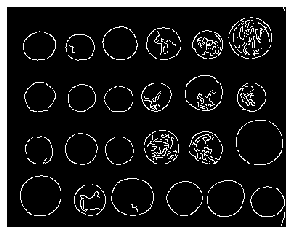

In [40]:
edge_image = feature.canny(image, sigma=1, low_threshold=35, high_threshold=190)
display(edge_image)

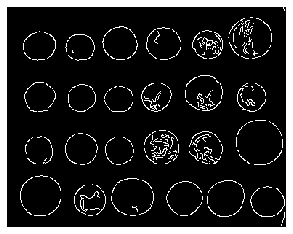

In [41]:
edge_image = feature.canny(image, sigma=1, low_threshold=55, high_threshold=190)
display(edge_image)

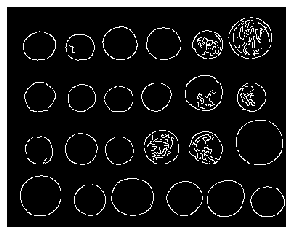

In [42]:
edge_image = feature.canny(image, sigma=1, low_threshold=35, high_threshold=210)
display(edge_image)

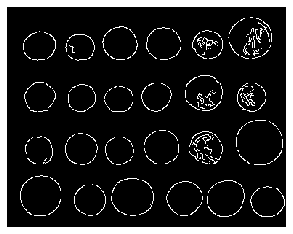

In [43]:
edge_image = feature.canny(image, sigma=1, low_threshold=35, high_threshold=230)
display(edge_image)

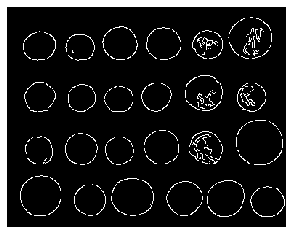

In [44]:
edge_image = feature.canny(image, sigma=1, low_threshold=45, high_threshold=230)
display(edge_image)

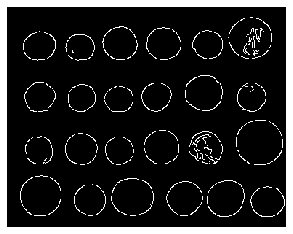

In [45]:
edge_image = feature.canny(image, sigma=1, low_threshold=45, high_threshold=250)
display(edge_image)

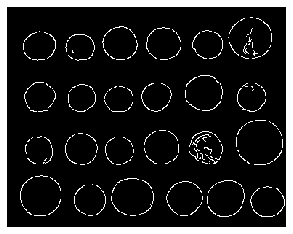

In [47]:
edge_image = feature.canny(image, sigma=1, low_threshold=55, high_threshold=250)
display(edge_image)

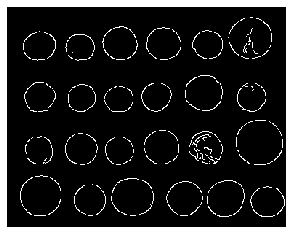

In [49]:
edge_image = feature.canny(image, sigma=1, low_threshold=65, high_threshold=250)
display(edge_image)

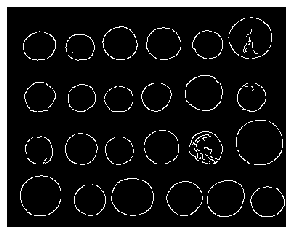

In [50]:
edge_image = feature.canny(image, sigma=1, low_threshold=75, high_threshold=250)
display(edge_image)

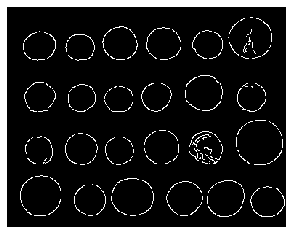

In [51]:
edge_image = feature.canny(image, sigma=1, low_threshold=85, high_threshold=250)
display(edge_image)

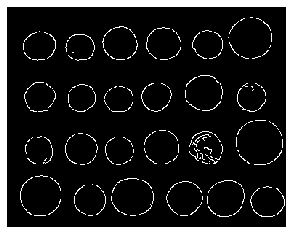

In [58]:
edge_image = feature.canny(image, sigma=1, low_threshold=60, high_threshold=295)
display(edge_image)

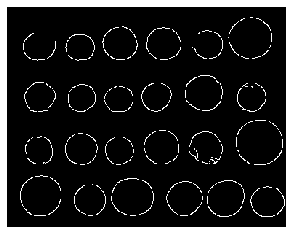

In [64]:
edge_image = feature.canny(image, sigma=1, low_threshold=130, high_threshold=295)
display(edge_image)

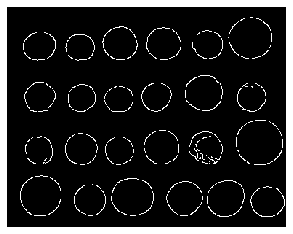

In [78]:
edge_image = feature.canny(image, sigma=1, low_threshold=110, high_threshold=297)
display(edge_image)

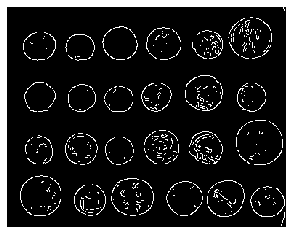

In [20]:
edge_image = feature.canny(image, sigma=1, low_threshold=110, high_threshold=70)
display(edge_image)

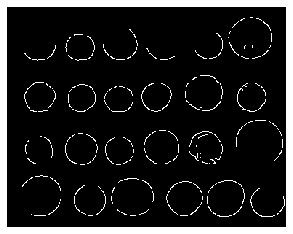

In [26]:
edge_image = feature.canny(image, sigma=1, low_threshold=200, high_threshold=240)
display(edge_image)

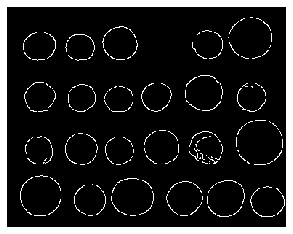

In [27]:
edge_image = feature.canny(image, sigma=1, low_threshold=110, high_threshold=300)
display(edge_image)

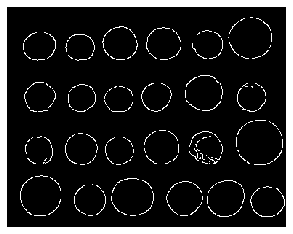

In [45]:
edge_image = feature.canny(image, sigma=1, low_threshold=113, high_threshold=298)
display(edge_image)

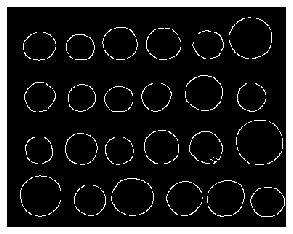

In [52]:
edge_image = feature.canny(image, sigma=2, low_threshold=70, high_threshold=140)
display(edge_image)

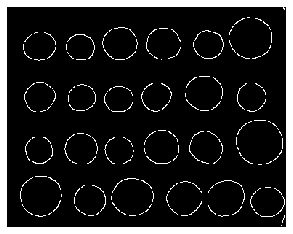

In [67]:
edge_image = feature.canny(image, sigma=3, low_threshold=10, high_threshold=60)
display(edge_image)

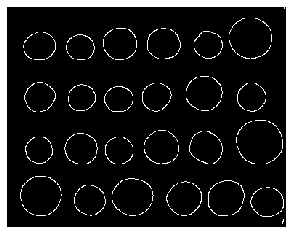

In [75]:
edge_image = feature.canny(image, sigma=4, low_threshold=2, high_threshold=40)
display(edge_image)

5. In my opinion, the best parameters I was able to get were sigma=2, low_threshold=70, and high_threshold=140.

6.
Try running the edge detector on some different images. skimage.data has a good set to start with. You can also look at Berkeley's collection of benchmark images. Take notes on which images Canny performs well on, and which it does not.

In [76]:
cameraman = data.camera()

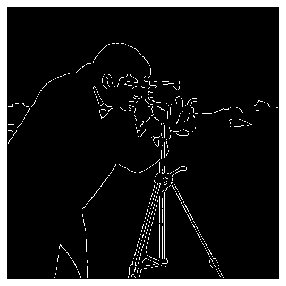

In [99]:
edge_image = feature.canny(cameraman, sigma=2, low_threshold=60, high_threshold=100)
display(edge_image)

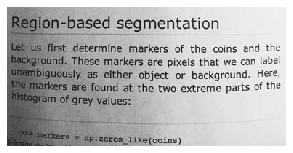

In [88]:
page = data.page()
display(page)

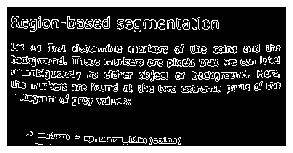

In [96]:
edge_image = feature.canny(page, sigma=1, low_threshold=70, high_threshold=110)
display(edge_image)

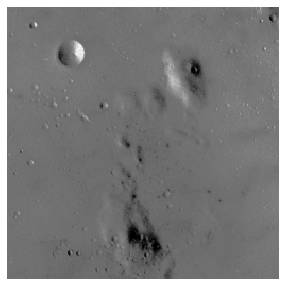

In [90]:
moon = data.moon()
display(moon)

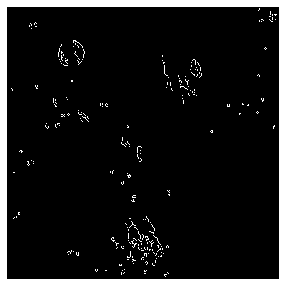

In [103]:
edge_image = feature.canny(moon, sigma=1, low_threshold=30, high_threshold=70)
display(edge_image)

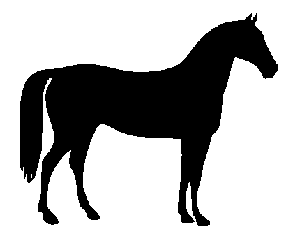

In [105]:
horse = data.horse()
display(horse)

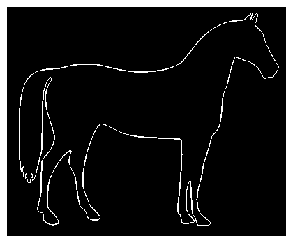

In [121]:
edge_image = feature.canny(horse, sigma=0, low_threshold=0, high_threshold=0)
display(edge_image)

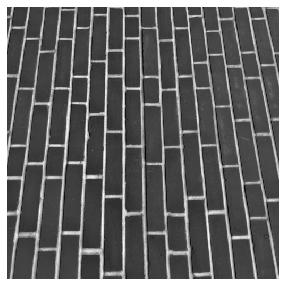

In [129]:
brick = data.brick()
display(brick)

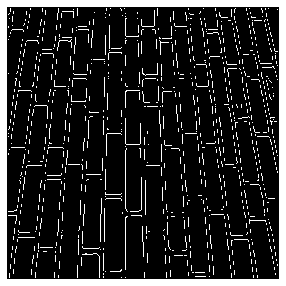

In [155]:
edge_image = feature.canny(brick, sigma=3, low_threshold=4, high_threshold=9)
display(edge_image)

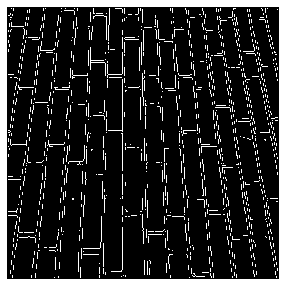

In [290]:
edge_image = feature.canny(brick, sigma=1, low_threshold=10, high_threshold=30)
display(edge_image)

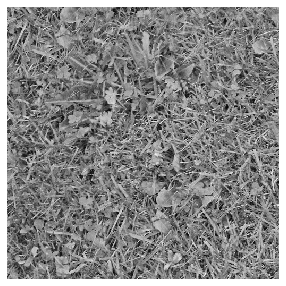

In [156]:
grass = data.grass()
display(grass)

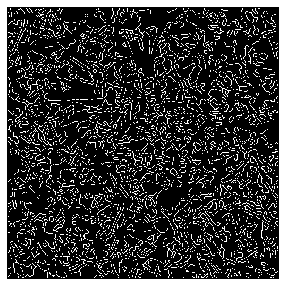

In [164]:
edge_image = feature.canny(grass, sigma=2, low_threshold=40, high_threshold=80)
display(edge_image)

6. Canny performed well on cameraman, text (debatably), and horse. It did not perform well on moon, bricks, and grass.
My observations are that canny performs well when there are obvious edges. In the case of the cameraman, even though there were areas of small detail like the lawn, the canny could filter those out. In the case of the moon however, there were no clear edges so there was nothing to detect in the image. With the grass, there were a lot of edges, but none clearly dominant, so it either detected everything as edges, or the brightest edges, which weren't that important to the image themselves. The text shows that canny can perform well on text, however there needs to be enough resolution in the image for the edges to actually form letters. The reason why the algorithm failed with the bricks, from my assessment, is that the compression algorithm used on the image caused there to be "staggered" areas of smooth and sharp transition between brick and morter, leading to the striped pattern from the canny filter.

# Hough Transform

In this exercise, we'll explore how edge detection and line-finding can be used to implement part of a self-driving car algorithm.

We'll start with the steps we covered in lecture: find the edges and then find the lines.

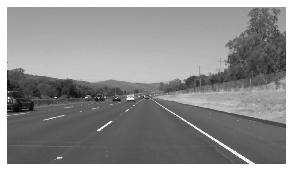

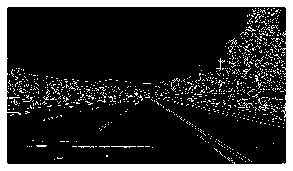

In [165]:
image = cv2.imread('./road.jpg', flags=cv2.IMREAD_GRAYSCALE)

display(image)
edge_image = feature.canny(image, sigma=1, low_threshold=10, high_threshold=30)
display(edge_image)

We'll use the probabilistic hough transform function, as it's a bit easier to work with.

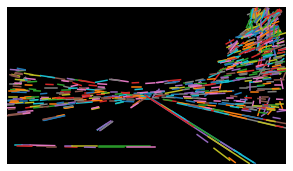

In [166]:
from skimage.transform import probabilistic_hough_line

# Line finding using the Probabilistic Hough Transform
lines = probabilistic_hough_line(edge_image, threshold=1, line_length=20,
                                 line_gap=5)

plt.figure(figsize = (5,5))
plt.imshow(edge_image * 0)
plt.axis('off')
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))


# Exercise 3

1. We've found some lines. Lots of them, in fact. Using only the techniques we've learned so far, how can we clean up this image to only show the lines that correspond to lanes? Optional: implement some of them and show the improvement in the produced image.

2. We can also use additional information that we have about the image; namely, we know that our images are always coming from a camera mounted on the front of the car. How could we use this information to improve on our lane-finding algorithm? Optional: implement your suggestion and show the improvement in the produced image.

3. A video is just a series of images (usually 30 images per second). Imagine that your lane-finding algorithm is being fed a video from a front-mounted camera. Describe how you would use your lane-finding algorithm to keep the car driving straight and in its lane.

1. I would increase sigma to remove noise from the trees, and increase both thresholds significantly.

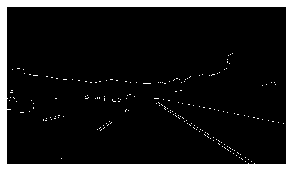

In [251]:
edge_image = feature.canny(image, sigma=3, low_threshold=40, high_threshold=70)
display(edge_image)

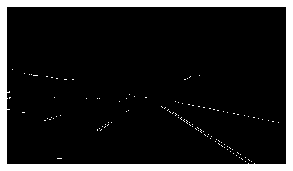

In [270]:
edge_image = feature.canny(image, sigma=2, low_threshold=110, high_threshold=130)
display(edge_image)

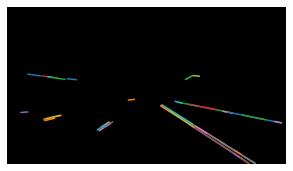

In [271]:
lines = probabilistic_hough_line(edge_image, threshold=1, line_length=20,
                                 line_gap=5)

plt.figure(figsize = (5,5))
plt.imshow(edge_image * 0)
plt.axis('off')
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))

2. I would set the top half of the image to 0, to keep just the bottom half which is almost entirely lanes from the perspective of the camera.

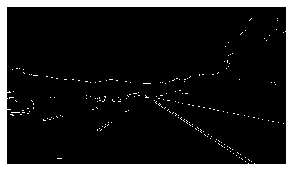

In [240]:
edge_image = feature.canny(image, sigma=2, low_threshold=60, high_threshold=80)
display(edge_image)

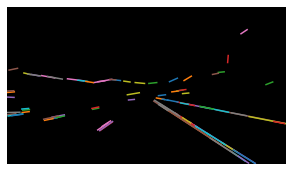

In [197]:
lines = probabilistic_hough_line(edge_image, threshold=1, line_length=20,
                                 line_gap=5)

plt.figure(figsize = (5,5))
plt.imshow(edge_image * 0)
plt.axis('off')
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))

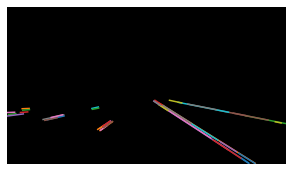

In [242]:
edge_image = feature.canny(image, sigma=2, low_threshold=60, high_threshold=80)
edge_image[:int(len(edge_image)/2)+50] = 0
lines = probabilistic_hough_line(edge_image, threshold=1, line_length=20,
                                 line_gap=5)

plt.figure(figsize = (5,5))
plt.imshow(edge_image * 0)
plt.axis('off')
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))

3. Repeat this process for each frame: first, I would extend the lines from the hough transform infinitely. Then I would find those closest to the center on the left and right on the bottom edge of the image. If their angles are not symmetrical, then I would turn the wheel towards the direction they were facing in (for the case where the road turns). If I find that they are not symmetrical distance from the middle I would make a small correction in the direction of the farther line from the center (for the case where the car drifts in the lane). Since this algorithm always aims to stay in the center, even when I overcorrect it should return the car to the middle in the next series of frames.